# Thêm các thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# I. Chuẩn bị dữ liệu

## 1. Đọc dữ liệu

In [6]:
df = pd.read_csv("Invistico_Airline.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [8]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Chúng ta có thể thấy tập dữ liệu này gồm các nhóm liên quan đến thuộc tính của khác hàng (Age, Gender,...), thông tin vè chuyến bay (Class, Inflight wifi service, ...), đánh giá của khách hàng (Seat comfort, Food and drink, ...). 

Loại dữ liệu của từng nhóm
- Thuộc tính khách hàng: Object 
- Thông tin chuyến bay: Interger and Object 
- Đánh giá của khách hàng: Interger (1->5) 
- Độ hài lòng: Binary (0, 1) 

In [9]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

## 2. Tổng quan về dữ liệu

Phân phối của dữ liệu 

In [10]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
#function to see values in each column
def list_values_column(df,num_value):
    display(Markdown('**RESULT:'))
    print('DataFrame has {} column '.format(len(df.columns)))
    for col in df.columns:
        if df[col].nunique() <= num_value:
            print('Column {} has :'.format(col)+ str(df[col].unique().tolist()),)
    

In [12]:
[[j, df[j].unique()] for j in [i for i in df.columns] if df[j].nunique() <= 5]

[['satisfaction', array(['satisfied', 'dissatisfied'], dtype=object)],
 ['Gender', array(['Female', 'Male'], dtype=object)],
 ['Customer Type',
  array(['Loyal Customer', 'disloyal Customer'], dtype=object)],
 ['Type of Travel',
  array(['Personal Travel', 'Business travel'], dtype=object)],
 ['Class', array(['Eco', 'Business', 'Eco Plus'], dtype=object)],
 ['Baggage handling', array([3, 4, 1, 2, 5], dtype=int64)]]

In [13]:
list_values_column(df,6)

**RESULT:

DataFrame has 23 column 
Column satisfaction has :['satisfied', 'dissatisfied']
Column Gender has :['Female', 'Male']
Column Customer Type has :['Loyal Customer', 'disloyal Customer']
Column Type of Travel has :['Personal Travel', 'Business travel']
Column Class has :['Eco', 'Business', 'Eco Plus']
Column Seat comfort has :[0, 1, 4, 5, 2, 3]
Column Departure/Arrival time convenient has :[0, 1, 2, 3, 4, 5]
Column Food and drink has :[0, 1, 2, 3, 4, 5]
Column Gate location has :[2, 3, 4, 1, 5, 0]
Column Inflight wifi service has :[2, 0, 3, 4, 5, 1]
Column Inflight entertainment has :[4, 2, 0, 3, 5, 1]
Column Online support has :[2, 3, 4, 5, 1, 0]
Column Ease of Online booking has :[3, 2, 1, 5, 4, 0]
Column On-board service has :[3, 4, 1, 2, 5, 0]
Column Leg room service has :[0, 4, 3, 2, 5, 1]
Column Baggage handling has :[3, 4, 1, 2, 5]
Column Checkin service has :[5, 2, 4, 3, 1, 0]
Column Cleanliness has :[3, 4, 1, 2, 5, 0]
Column Online boarding has :[2, 3, 5, 4, 1, 0]


In [14]:
#function to see ratio of values in each columns
def values_count_column(df,num_value):
    display(Markdown('**RESULT:'))
    for col in df.columns:
        if df[col].nunique() <= num_value:
            print( 'Column ',col,':')
            print(df[col].value_counts()/len(df))

In [15]:
values_count_column(df,3)

**RESULT:

Column  satisfaction :
satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64
Column  Gender :
Female    0.507384
Male      0.492616
Name: Gender, dtype: float64
Column  Customer Type :
Loyal Customer       0.816908
disloyal Customer    0.183092
Name: Customer Type, dtype: float64
Column  Type of Travel :
Business travel    0.690584
Personal Travel    0.309416
Name: Type of Travel, dtype: float64
Column  Class :
Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64


In [16]:
[df[j].value_counts()/len(df[j]) for j in [i for i in df.columns] if df[j].nunique() <= 5]

[satisfied       0.547328
 dissatisfied    0.452672
 Name: satisfaction, dtype: float64,
 Female    0.507384
 Male      0.492616
 Name: Gender, dtype: float64,
 Loyal Customer       0.816908
 disloyal Customer    0.183092
 Name: Customer Type, dtype: float64,
 Business travel    0.690584
 Personal Travel    0.309416
 Name: Type of Travel, dtype: float64,
 Business    0.478596
 Eco         0.448945
 Eco Plus    0.072459
 Name: Class, dtype: float64,
 4    0.371420
 5    0.275239
 3    0.188520
 2    0.103419
 1    0.061403
 Name: Baggage handling, dtype: float64]

## 3. Chuẩn hóa tên cột

In [17]:
def rename_column(df,from_c,to_c = '_'):
    display(Markdown('**RESULT:**'))
    print('Columns changed from {} to _'.format(from_c))
    print(df.columns[df.columns.str.contains(from_c)])
    df.columns = [label.replace(from_c, to_c ) for label in df.columns]

In [18]:
rename_column(df,' ')
rename_column(df,'-')

**RESULT:**

Columns changed from   to _
Index(['Customer Type', 'Type of Travel', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


**RESULT:**

Columns changed from - to _
Index(['On-board_service'], dtype='object')


## 4. Xem xét dữ liệu rỗng

In [19]:
total = df.isna().sum()
total

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

-> Arrival_Delay_in_Minutes có 393 dữ liệu bị rỗng

In [20]:
def Missing_table(df):    
    sum_na = df.isna().sum()
    miss_percent = sum_na/len(df)
    Na_table = pd.concat([sum_na,miss_percent],axis = 1)
    Na_table = Na_table.rename(columns = {0:'Sum_of_na',1:'Percent_na'})
    Na_table = Na_table[Na_table.iloc[:,1]!=0]
    Na_table
    return Na_table

In [21]:
Missing_table(df)

,Sum_of_na,Percent_na
Arrival_Delay_in_Minutes,393,0.003026


## 5. Mã hóa biến phụ thuộc

In [22]:
en = LabelEncoder()
df['satisfaction'] = en.fit_transform(df['satisfaction'])

In [23]:
df

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# II. Trực quan hóa dữ liệu

### 1. Tỷ lệ giữa các giá trị của biến phụ thuộc

In [24]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

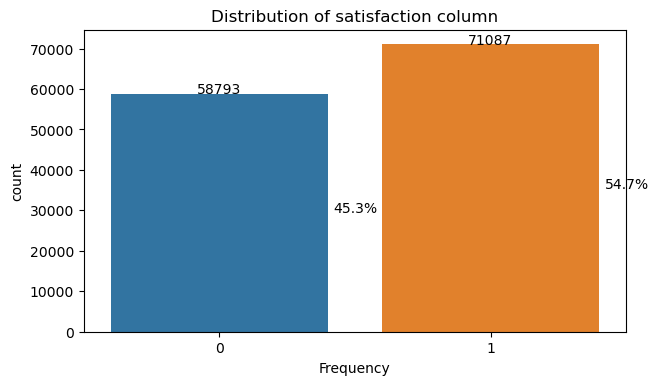

In [25]:
plt.figure(figsize= (7,4), dpi= 100)
plot_target_column(df, "satisfaction")

### 2. Trực quan hóa các thuộc tính của khách hàng theo biến phụ thuộc

- Select customer's properties columns

In [26]:
df["Age_cat"] = pd.cut(df["Age"], bins= [0, 27, 57, 77, np.inf]
        , labels= ["7-27", "27-57", "57-77", "77-85"])

- Separate customers into 4 groups according to Age  

In [27]:
bin_user_prop = [i for i in df.loc[:,"satisfaction":"Class"].columns if i not in ('Age', 'Type_of_Travel', 'Class')]

In [28]:
bin_user_prop.append("Age_cat")

In [29]:
bin_user_prop

['satisfaction', 'Gender', 'Customer_Type', 'Age_cat']

In [30]:
df[bin_user_prop]

,satisfaction,Gender,Customer_Type,Age_cat
0,1,Female,Loyal Customer,57-77
1,1,Male,Loyal Customer,27-57
2,1,Female,Loyal Customer,7-27
3,1,Female,Loyal Customer,57-77
4,1,Female,Loyal Customer,57-77
...,...,...,...,...
129875,1,Female,disloyal Customer,27-57
129876,0,Male,disloyal Customer,57-77
129877,0,Male,disloyal Customer,57-77
129878,0,Male,disloyal Customer,57-77


- Using countplot to visualize customer's properties along with satisfaction

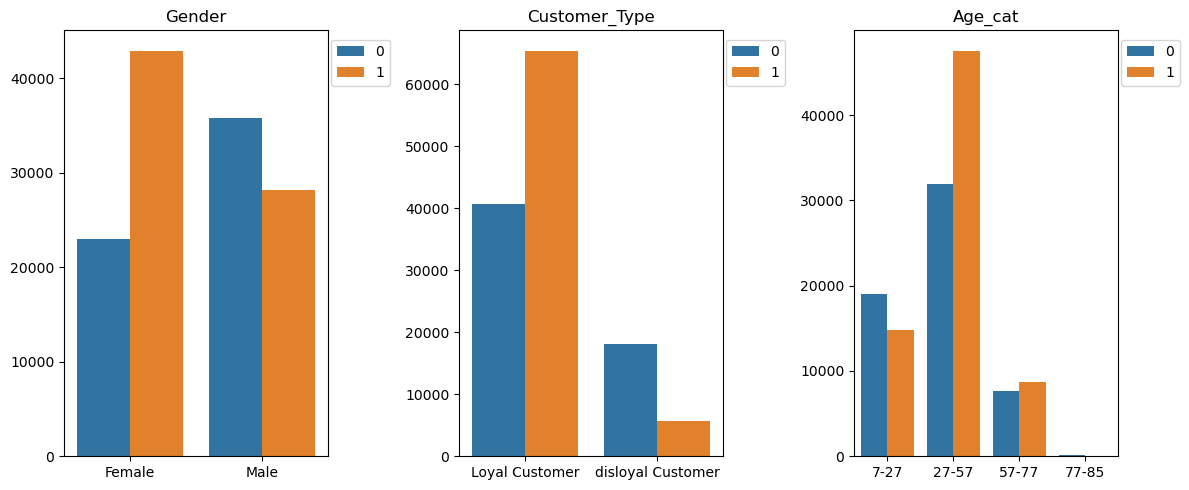

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12, 5), dpi= 100)
for i in range(0,3):
        sns.countplot(data= df[bin_user_prop], x= bin_user_prop[i + 1], hue= "satisfaction", ax= axes[i])
        axes[i].legend(loc= (1.01, 0.87))
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set(title= bin_user_prop[i + 1])

plt.tight_layout()
plt.show()

Look like an easygoing female like a male
...


### 3. Trực quan hóa thông tin của chuyến bay theo biến phụ thuộc

<AxesSubplot:xlabel='Flight_Distance', ylabel='Type_of_Travel'>

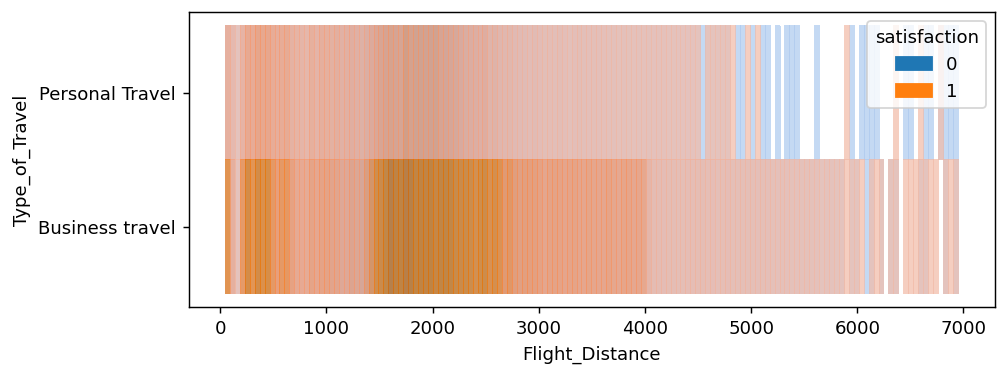

In [32]:
plt.figure(figsize= (8, 3), dpi = 130)
sns.histplot(data= df, x= 'Flight_Distance', y= 'Type_of_Travel', hue= 'satisfaction', alpha = 0.7)

- Có sự khác biệt về phân bố của khoảng cách bay và độ hài lòng giữa các mục đích du lịch

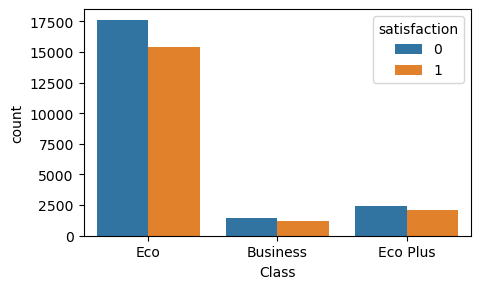

In [33]:
plt.figure(figsize= (5, 3), dpi = 100)
sns.countplot(data= df[df['Type_of_Travel'] == 'Personal Travel'], x= 'Class', hue= 'satisfaction')
plt.show()

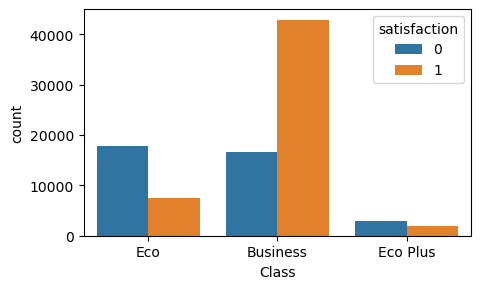

In [34]:
plt.figure(figsize= (5, 3), dpi = 100)
sns.countplot(data= df[df['Type_of_Travel'] == 'Business travel'], x= 'Class', hue= 'satisfaction')
plt.show()

- Vấn đề phát hiện qua trực quan hóa: 
    + Loại vé Eco thường sử dụng cho mục đích Personal Travel và nhìn chung, khách hàng đang không hài lòng với dịch vụ ở hạng mục vé này khi đi xa 
    + Loại vé Business thường được khách hàng đánh giá tốt ở nhiều mục đích sử dụng
    + Loại vé Eco Plus không có quá nhiều khác biệt đối với các mục đích sử dụng khác nhau và số lượng hành khách thuộc loại vé này còn khá ít
- Giải pháp đề xuất: 
    + Cần xem xét thay đổi dịch vụ với hạng vé Eco dành cho những chuyến bay xa đặc biệt đối với những dịch vụ ở trên chuyến bay như giải trí, chỗ ngồi, đồ ăn, ...
    + Cung cấp thêm nhiều dịch vụ đặc biệt cho hạng vé Eco Plus, cần thêm marketing, PR ... cho loại vé này 

In [35]:
corr_matrix = df.corr()
corr_matrix['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Inflight_entertainment               0.523496
Ease_of_Online_booking               0.431772
Online_support                       0.390143
On_board_service                     0.352047
Online_boarding                      0.338147
Leg_room_service                     0.304928
Checkin_service                      0.266179
Baggage_handling                     0.260347
Cleanliness                          0.259330
Seat_comfort                         0.242384
Inflight_wifi_service                0.227062
Food_and_drink                       0.120677
Age                                  0.117971
Gate_location                       -0.012071
Departure/Arrival_time_convenient   -0.015507
Flight_Distance                     -0.039224
Departure_Delay_in_Minutes          -0.073909
Arrival_Delay_in_Minutes            -0.080691
Name: satisfaction, dtype: float64

#### Vẽ biểu đồ heatmap với những cột có điểm corr tương đối cao

<AxesSubplot:xlabel='Ease_of_Online_booking', ylabel='satisfaction'>

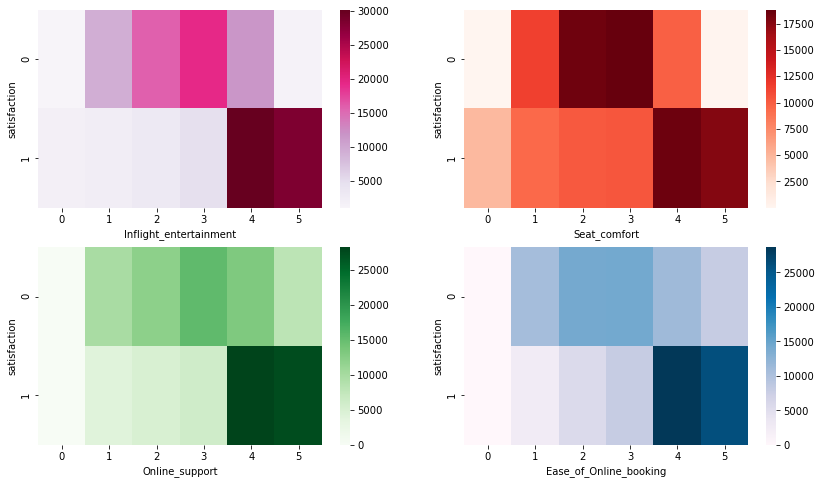

In [36]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(df['satisfaction'], df['Inflight_entertainment'])
sns.heatmap(table1, cmap='PuRd',ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Seat_comfort'])
sns.heatmap(table2, cmap='Reds',ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'], df['Online_support'])
sns.heatmap(table3, cmap='Greens',ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Ease_of_Online_booking'])
sns.heatmap(table4, cmap='PuBu',ax = axarr[1][1])

Có sự tương quan rõ rệt với satisfaction.
 Rất nhiều đánh giá 4,5 được xếp vào loại hài lòng
 Ngược lại, rất nhiều đánh giá 1-3 thì xếp vào loại không hài lòng. 
##### Cho thấy những feature này có tác động lớn vào đánh giá độ hài lòng của khách hàng

<AxesSubplot:xlabel='Gate_location', ylabel='satisfaction'>

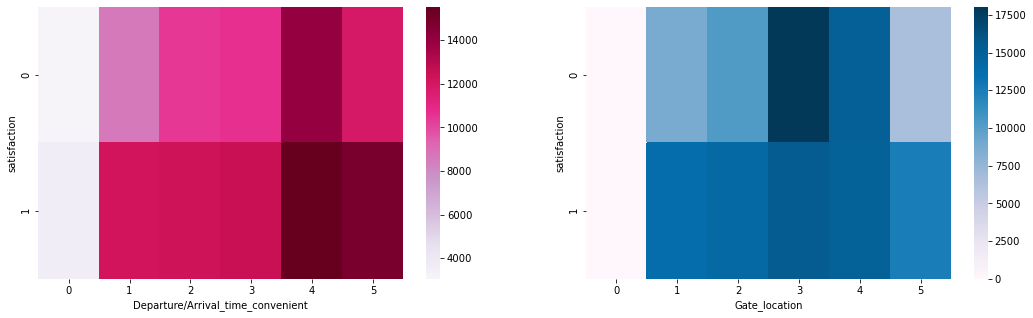

In [37]:
#biểu đồ heatmap với những cột có hệ số tương quan cực thấp 
#Gate_location                       -0.012071
#Departure/Arrival_time_convenient   -0.015507 
fig, axarr = plt.subplots(1, 2, figsize=(18, 5))

table1 = pd.crosstab(df['satisfaction'], df['Departure/Arrival_time_convenient'])
sns.heatmap(table1, cmap='PuRd',ax = axarr[0])
table2 = pd.crosstab(df['satisfaction'], df['Gate_location'])
sns.heatmap(table2, cmap='PuBu',ax = axarr[1])


Cả 2 biều đồ trên đều không cho thấy sự tương quan. Những đánh giá 1,2,3 không khác biệt so với 4,5 sao về đánh giá độ hài lòng khách hàng. 
- Ta kết luận đươc rằng 2 feature trên không ảnh hưởng nhiều đến mức độ hài lòng khách hàng

#### Biểu đồ heatmap với những cột có hệ số tương quan so với satisfaction không cao 

<AxesSubplot:xlabel='Food_and_drink', ylabel='satisfaction'>

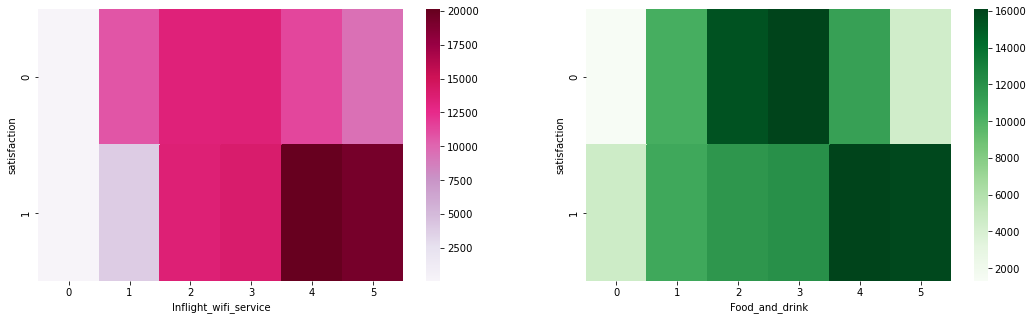

In [38]:

fig, axarr = plt.subplots(1, 2, figsize=(18, 5))

table = pd.crosstab(df['satisfaction'], df['Inflight_wifi_service'])
sns.heatmap(table, cmap='PuRd',ax = axarr[0])
table1 = pd.crosstab(df['satisfaction'], df['Food_and_drink'])
sns.heatmap(table1, cmap='Greens',ax = axarr[1])

Sự hài lòng của khách hàng không quá phụ thuộc vào Inflight_wifi_service và Food_and_drink

### 4. Tương quan giữa các tính tăng trong bộ dữ liệu

<AxesSubplot:>

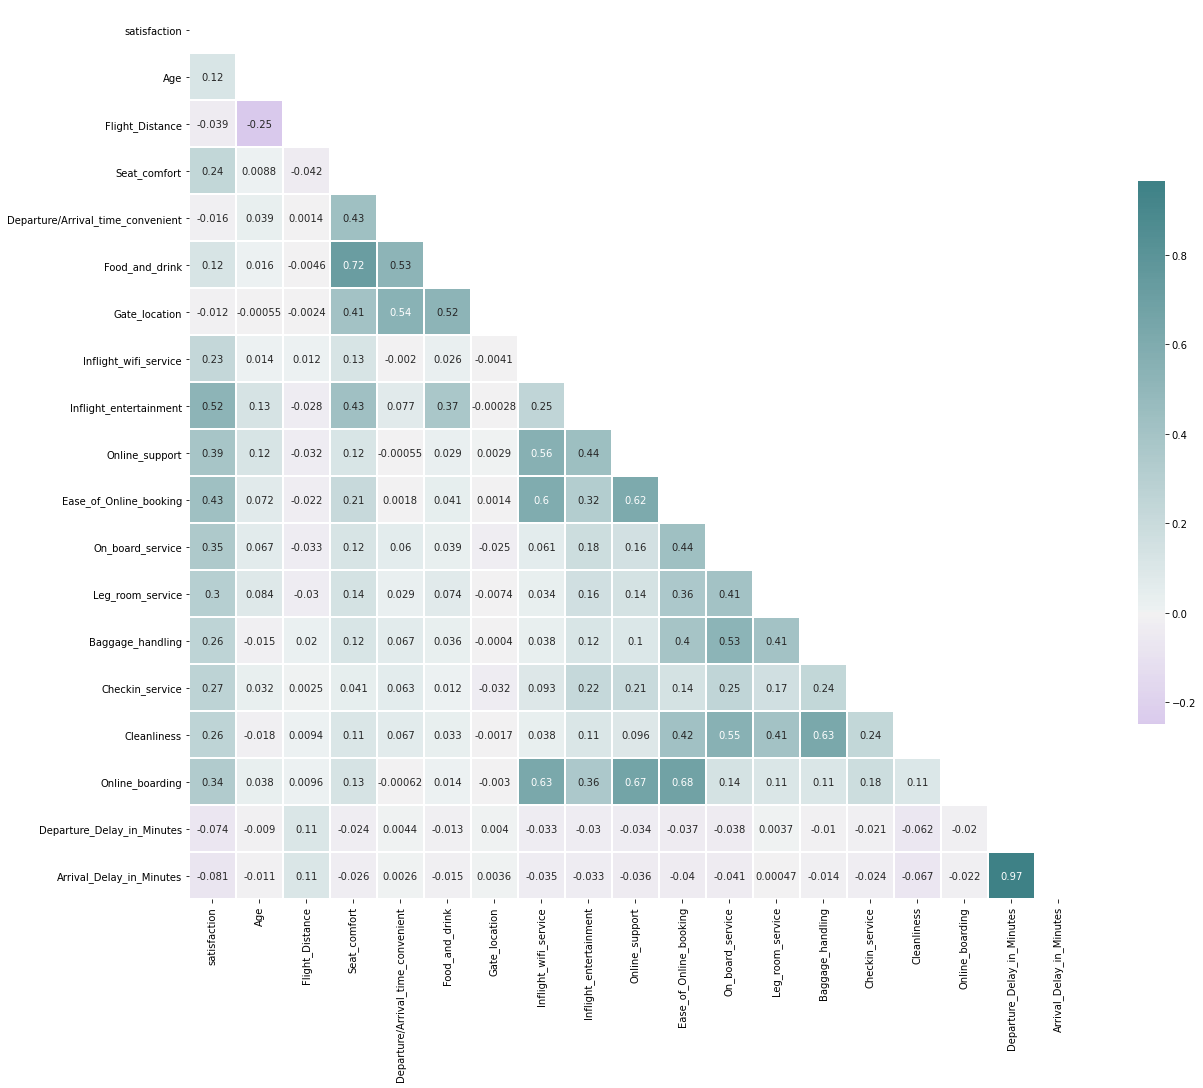

In [39]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(1000, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Departure_Delay_in_Minutes tương quan cao với Arrival_Delay_in_Minutes từ 0.97 ~ 1
##### Kết luận: kết hợp Arrival_Delay_in_minutes và Departure_Delay_in_Minutes thành Delay_in_Minutes

In [40]:
df['Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'] + df['Departure_Delay_in_Minutes']
df.drop(['Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes'],axis = 1, inplace=True)

## III. Chuẩn bị dữ liệu cho mô hình


### 1. Chia thành tập huấn luyện, phát triển và kiểm thử

#### Lấy mẫu theo thuộc tính

In [41]:
#df['Age_cat'] = df['Age_cat'].astype('object')

In [42]:
# stratified sampling by Age_cat
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101)
for train_index, group_index in split.split(df, df["Age_cat"]):
    strat_train_set = df.loc[train_index]
    strat_group_set = df.loc[group_index]
# test size = 0.2
split_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=101)
for dev_index, test_index in split_2.split(strat_group_set, strat_group_set["Age_cat"]):
    strat_dev_set = strat_group_set.iloc[dev_index]
    strat_test_set = strat_group_set.iloc[test_index]

In [43]:
strat_train_set.drop("Age_cat", axis= 1, inplace= True)
strat_dev_set.drop("Age_cat", axis= 1, inplace= True)
strat_test_set.drop("Age_cat", axis= 1, inplace= True)

C:\Users\Taichi\anaconda3\envs\my-env-name\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Đổi tên các tập dữ liệu

In [44]:
# Tập huấn luyện
y_train = strat_train_set['satisfaction']
X_train = strat_train_set.drop("satisfaction",axis =1 )

In [45]:
# Tập phát triển
y_dev = strat_dev_set['satisfaction']
X_dev = strat_dev_set.drop("satisfaction",axis = 1)

In [46]:
# Tập kiểm thử
y_test = strat_test_set['satisfaction']
X_test = strat_test_set.drop("satisfaction",axis = 1)

### 2. Xây dựng Pipeline xử lý dữ liệu cho mô hình

In [47]:
# Rút trích tên cột các thuộc tính phân loại và số liệu
col_cat = X_train.columns[X_train.dtypes==object]
col_num = X_train.columns[X_train.dtypes!=object]

In [48]:
onehot_col = ['Gender', 'Customer_Type', 'Type_of_Travel']
ordi_col = col_cat.drop(['Gender', 'Customer_Type', 'Type_of_Travel'])

#####  Pipeline cho số liệu

In [49]:
#pipeline handle missing values and scaling feature
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="mean")),
 ('std_scaler', MinMaxScaler()),
 ])

##### Pipeline tổng thể

In [50]:
# Pipeline tổng thể xử lý dữ liệu phân loạivà số học
full_pipeline = ColumnTransformer([
         ("num", num_pipeline, col_num),
         ("ordi",OrdinalEncoder(), ordi_col),
         ("onehot",OneHotEncoder(), onehot_col)
 ])

In [51]:
full_pipeline.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std_scaler',
                                                  MinMaxScaler())]),
                                 Index(['Age', 'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Delay_in_Minutes'],
      dtype='object')),
                                ('ordi', OrdinalEncoder(),
                                 Index(['Class'], dtype='object')),
                                ('onehot', OneHotEncoder(),
                                 ['Gender', 'Customer_Type',
                                  'Type_of_Travel'])])

Xử lý tên cột cho các thuộc tính khi đi qua Pipeline

In [52]:
col_name = list(col_num) + list(ordi_col)
full_col_name = col_name + list(full_pipeline.named_transformers_.onehot.get_feature_names())

In [53]:
# Đưa các tập dữ liệu qua Pipeline
X_train= full_pipeline.transform(X_train)
X_train = pd.DataFrame(X_train,columns=full_col_name)

X_test = full_pipeline.transform(X_test)
X_test = pd.DataFrame(X_test,columns=full_col_name)

X_dev = full_pipeline.transform(X_dev)
X_dev = pd.DataFrame(X_dev,columns=full_col_name)

# IV. Lựa chọn và tối ưu mô hình máy học

## 1. Logistic Regression

In [54]:
log_reg = LogisticRegression(max_iter= 1000)

In [55]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
predict_dev = log_reg.predict(X_dev)

In [57]:
print(confusion_matrix(predict_dev, y_dev))

[[4731  996]
 [1117 6144]]


In [58]:
print(classification_report(predict_dev, y_dev))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5727
           1       0.86      0.85      0.85      7261

    accuracy                           0.84     12988
   macro avg       0.83      0.84      0.84     12988
weighted avg       0.84      0.84      0.84     12988



## 2. Neural Network

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
tf.random.set_seed(1234)

In [61]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer0"),
        layers.Dense(256, activation="relu", name="layer1"),
        
        layers.Dense(128, activation="linear", name="layer4"),    
        layers.Dense(1, activation='sigmoid')
    ]
)

In [62]:
model.compile(
        optimizer="adam",
        loss='BinaryCrossentropy',
        metrics=[tf.keras.metrics.BinaryAccuracy()],
        
)

In [63]:
history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
    validation_data=(X_dev, y_dev)
)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

406/406 [==============================] - 1s 3ms/step - loss: 0.2348 - binary_accuracy: 0.9009 - val_loss: 0.1791 - val_binary_accuracy: 0.9252
Epoch 2/10
406/406 [==============================] - 1s 3ms/step - loss: 0.1547 - binary_accuracy: 0.9340 - val_loss: 0.1545 - val_binary_accuracy: 0.9325
Epoch 3/10
406/406 [==============================] - 1s 2ms/step - loss: 0.1347 - binary_accuracy: 0.9420 - val_loss: 0.1375 - val_binary_accuracy: 0.9424
Epoch 4/10
406/406 [====================

In [64]:
y_proba_neural = model.predict(X_test)

In [65]:
print(classification_report(y_proba_neural > 0.5 , y_test))

              precision    recall  f1-score   support

       False       0.96      0.93      0.95      6006
        True       0.94      0.97      0.95      6982

    accuracy                           0.95     12988
   macro avg       0.95      0.95      0.95     12988
weighted avg       0.95      0.95      0.95     12988



## 3. Randomforest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rdf_model = RandomForestClassifier(verbose= 1 ,  n_jobs= -1, random_state= 101)

In [68]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 50],
    'max_features': [5],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [120, 140]
}

In [69]:
grid_search = GridSearchCV(estimator = rdf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [70]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 50],
                         'max_features': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [120, 140]})

In [72]:
grid_search.best_score_

0.9574414741576524

In [73]:
y_proba_grid = grid_search.predict(X_dev)
print(classification_report(y_proba_grid, y_dev))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5967
           1       0.95      0.97      0.96      7021

    accuracy                           0.96     12988
   macro avg       0.96      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.0s finished


In [75]:
rdf_model = RandomForestClassifier(n_jobs= -1, random_state= 101,
                                 bootstrap= True, 
                                 max_features= 5,
                                 max_depth= 30,
                                 min_samples_split= 2,
                                 n_estimators= 120,
                                  verbose= 0)

In [76]:
rdf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=5, n_estimators=120,
                       n_jobs=-1, random_state=101)

In [76]:
rdf_model

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.0s finished


In [77]:
y_proba_rdf = rdf_model.predict(X_test)
print(classification_report(y_proba_rdf, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5957
           1       0.96      0.97      0.96      7031

    accuracy                           0.96     12988
   macro avg       0.96      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



Accuracy giữa các tập train-dev-test set không có sự chênh lệnh, mô hình không bị bias và variance.

 ## Thông dịch mô hình

In [78]:
log_ = pd.Series(log_reg.coef_.reshape(-1), X_dev.columns).sort_values(ascending= False)

In [79]:
rdf_ = pd.Series(rdf_model.feature_importances_, index= X_dev.columns).sort_values(ascending= False)

In [80]:
compare = pd.concat([rdf_,log_],axis= 1)
compare.columns = ['Random Forest','Logistic Regression']
compare

,Random Forest,Logistic Regression
Inflight_entertainment,0.206430,3.436761
Seat_comfort,0.129908,1.405997
Ease_of_Online_booking,0.072443,1.040326
Online_support,0.064847,0.479436
On_board_service,0.038131,1.545003
Food_and_drink,0.037768,-1.049059
Leg_room_service,0.033105,1.089688
Online_boarding,0.032984,0.888470
Flight_Distance,0.031631,-0.708445
x1_disloyal Customer,0.031288,-1.037317


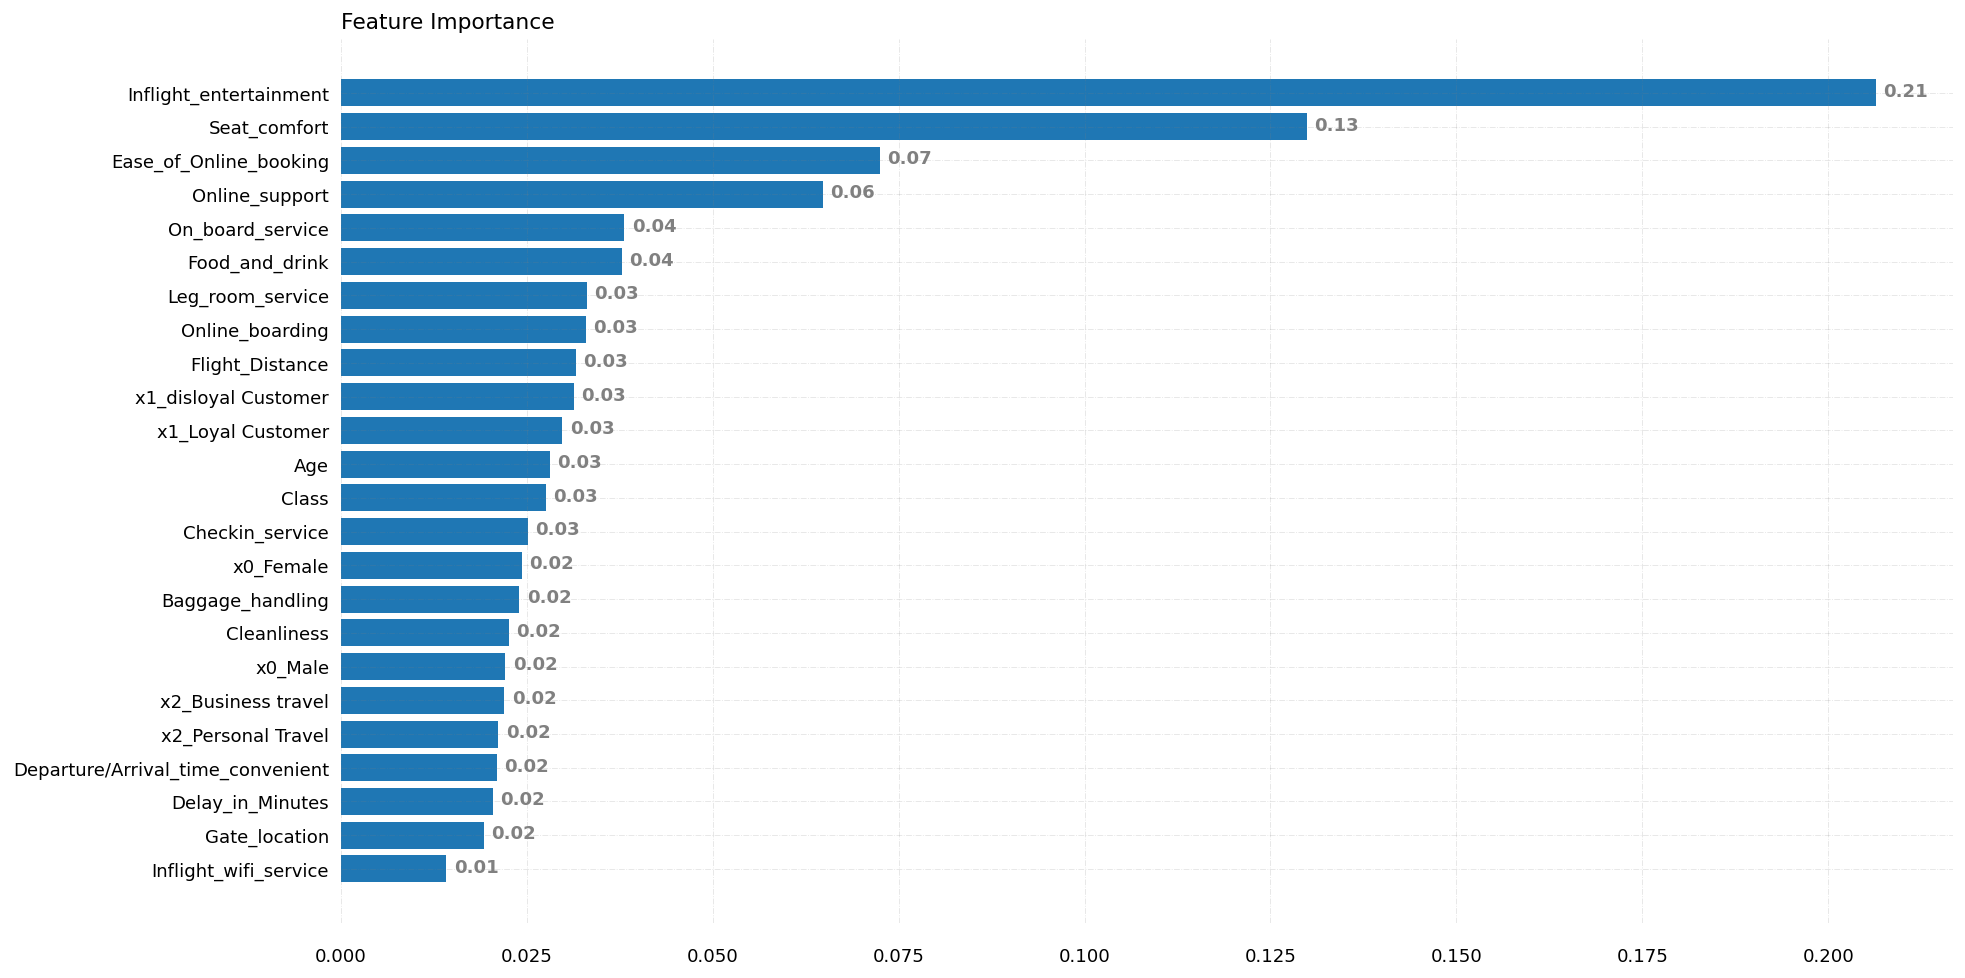

In [81]:
name = rdf_.index
price = rdf_.values

# Figure Size
fig, ax = plt.subplots(figsize =(16,9), dpi= 130)

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 3)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.001, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Feature Importance',
			loc ='left', )

# Show Plot
plt.show()


Từ phần trực quan và tham số của mô hình, ta thấy rằng chưa làm được hài lòng các khách hàng mới và các dịch vụ chưa tốt làm ảnh hưởng đến độ hài lòng như đồ ăn, thức uống và độ delay của chuyến bay. Độ chênh lệch về sự hài lòng giữa các loại vé còn khá lớn và đang nghiêng về phần không hài lòng, cần xem xét và đưa ra các phương án cải thiện cho từng loại vé khác nhau.